In [25]:
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix 
import numpy as np
import matplotlib.pyplot as plt
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))

In [26]:
x,L,EA, a, b = sp.symbols('x L EA a b')
f = 200*(1-x/L)
h = L/4
N_i = sp.Matrix([[1-x/h],[x/h]])
F_eq1 = sp.Matrix([[sp.integrate(f*N_i[0],(x,0,h))],[sp.integrate(f*N_i[1],(x,0,h))]])
displayEquations('N_i',N_i)

<IPython.core.display.Math object>

In [27]:
displayEquations('F_eq1',F_eq1)
F_eq2 = sp.Matrix([[sp.integrate(f*N_i[0],(x,h,2*h))],[sp.integrate(f*N_i[1],(x,h,2*h))]])
displayEquations('F_eq2',F_eq2)
F_eq3 = sp.Matrix([[sp.integrate(f*N_i[0],(x,2*h,3*h))],[sp.integrate(f*N_i[1],(x,2*h,3*h))]])
displayEquations('F_eq3',F_eq3)
F_eq4 = sp.Matrix([[sp.integrate(f*N_i[0],(x,3*h,4*h))],[sp.integrate(f*N_i[1],(x,3*h,4*h))]])
displayEquations('F_eq4',F_eq4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
K = (4*EA / L) * sp.Matrix([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,1]])
Feq = L/12 * sp.Matrix([[75],[125],[275],[250]])
u_fem = K.inv() @ Feq
print(K)
print(Feq)
displayEquations('u_fem',u_fem)

Matrix([[8*EA/L, -4*EA/L, 0, 0], [-4*EA/L, 8*EA/L, -4*EA/L, 0], [0, -4*EA/L, 8*EA/L, -4*EA/L], [0, 0, -4*EA/L, 4*EA/L]])
Matrix([[25*L/4], [125*L/12], [275*L/12], [125*L/6]])


<IPython.core.display.Math object>

In [29]:
u_x = (-100/EA)*(x**2 - (1/(3*L))*x**3) + (100*L*x)/EA
u_array = sp.Matrix([u_x.subs({x:h}), u_x.subs({x:2*h}), u_x.subs({x:3*h}), u_x.subs({x:4*h})])
displayEquations('u', u_array)

<IPython.core.display.Math object>

In [30]:
D2u = -1/EA * (200*(1-x/L))
Du = sp.integrate(D2u, x) + a
u = sp.integrate(Du, x) + b
displayEquations('u',u)
bc1 = u.subs(x, 0)
bc2 = EA * Du.subs(x, L)
bc3 = EA * Du.subs(x,0) - sp.integrate(f, (x, 0, L))
dof = sp.linsolve([bc1, bc3], [a,b])
(a_sol,b_sol) = next(iter(dof))
u = u.subs({a: a_sol, b: b_sol})
displayEquations('u',u)
u_array = sp.Matrix([u.subs({x:h}), u.subs({x:2*h}), u.subs({x:3*h}), u.subs({x:4*h})])
displayEquations('u', u_array)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

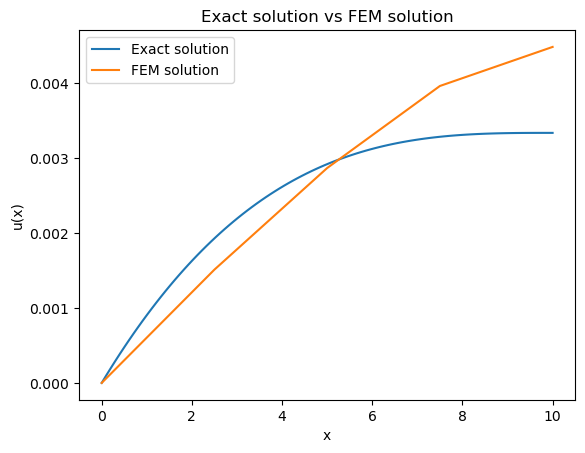

In [31]:
# Graphing the Exact vs FEM
u_fem = u_fem.subs({L:10,EA:0.1*10**7})
global_x = sp.Matrix([h,2*h,3*h,4*h])
global_x = global_x.subs({L:10})
u_list = np.array([[0],[0.00151041666666667], [0.00286458333333333], [0.00395833333333333], [0.00447916666666667]])
x_list = np.array([[0],[5/2], [5], [15/2], [10]])
u_exact = lambdify(x,u.subs({L:10,EA:0.1*10**7}))
x_linspace = np.linspace(0,10,100)
plt.plot(x_linspace,u_exact(x_linspace),label='Exact solution')
plt.plot(x_list,u_list,label='FEM solution')
plt.title('Exact solution vs FEM solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

In [32]:
# 6
# FEM solution
EA_np = 10**6
K_np = EA_np/30 * np.array([[3,-3],[-3,4]])
F_np = np.array([-35,125])
q_np = np.linalg.inv(K_np) @ (F_np)
global_x = [0,10,40]
print(q_np)
y_fem = [0.00235, 0.0027, 0]
y_prime = []
x_prime = []
for i in range(0,2):
    y_prime.append((y_fem[i+1]-y_fem[i])/(global_x[i+1]-global_x[i]))
    x_prime.append((global_x[i+1]-global_x[i])/2 + global_x[i])
j = [y_prime[0]] * 10 
j2 = [y_prime[1]] * 10 
print(j)
k1 = np.linspace(global_x[0],global_x[1],10)
k2 = np.linspace(global_x[1],global_x[2],10)

[0.00235 0.0027 ]
[3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05, 3.5000000000000004e-05]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

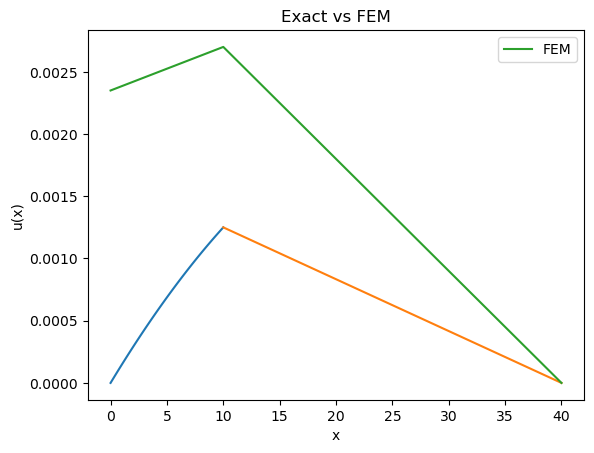

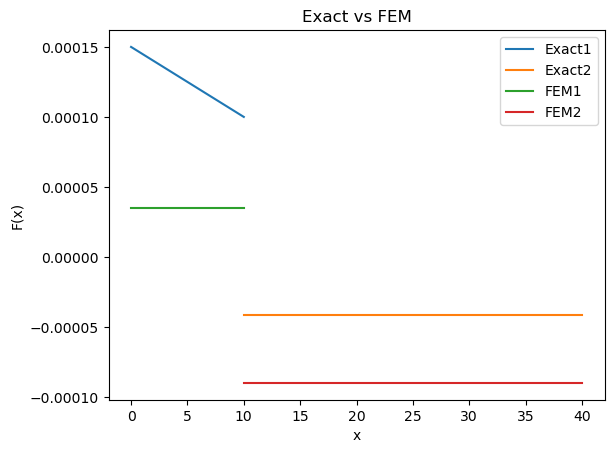

In [33]:
# Exact piecewise solution
    # for x in range(0, 10)
D2u1 = -1/EA * 5
Du1 = sp.integrate(D2u1, x) + a
u1 = sp.integrate(Du1, x) + b
bc2 = EA * Du1.subs(x, 0) + 60
bc3 = EA * Du1.subs(x,10) - 100
dof = sp.linsolve([bc1, bc3], [a,b])
(a_sol,b_sol) = next(iter(dof))
u1 = u1.subs({a: a_sol, b: b_sol})
u1 = u1.subs({EA:10**6})
displayEquations('u1',u1)
    # For x in range(10,40)
Du2 = -100/EA + a
u2 = sp.integrate(Du2, x) + b
bc = u2.subs(x,0) - u1.subs(x, 10)
bc2 = u2.subs(x,30)
dof = sp.linsolve([bc,bc2], [a,b])
(a_sol,b_sol) = next(iter(dof))
u2 = u2.subs({a: a_sol, b: b_sol})
u2 = u2.subs({EA:10**6})
displayEquations('u2',u2)
# finding the F(x)
F1 = u1.diff(x)
F2 = u2.diff(x)
displayEquations('F1',F1)
displayEquations('F2',F2)
# graphing the u(x) exact solution vs FEM
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 30, 100)
x2_global = np.linspace(10, 40, 100)
u1_np = lambdify(x, u1)
u2_np = lambdify(x, u2)
plt.plot(x1, u1_np(x1))
plt.plot(x2_global, u2_np(x2))
plt.plot(global_x, y_fem, label='FEM')
plt.title('Exact vs FEM')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()
# graphing the F(x)
F1_np = lambdify(x, F1)
F2_np = [F2] * len(x2)
plt.plot(x1, F1_np(x1),label='Exact1')
plt.plot(x2_global, F2_np,label='Exact2')
plt.plot(k1,j, label='FEM1')
plt.plot(k2,j2, label='FEM2')
plt.legend()
plt.title('Exact vs FEM')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

In [34]:
#### Problem 9 ####
    # Exact solution
Q,alpha,Delta_T = sp.symbols('Q alpha Delta_T')
D2u = -1/EA * 200*(1-x**3/L**3) + alpha * Delta_T
Du = sp.integrate(D2u,x) + a
u = sp.integrate(Du,x) + b
fbc = EA * Du.subs(x,L) - Q
kbc = u.subs(x,0)
dof = sp.linsolve([fbc,kbc],[a,b])
(a_sol,b_sol) = next(iter(dof))
u = u.subs({a:a_sol,b:b_sol})
displayEquations('u(x)',u)
strain = u.diff(x)
displayEquations('strain(x)',strain)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

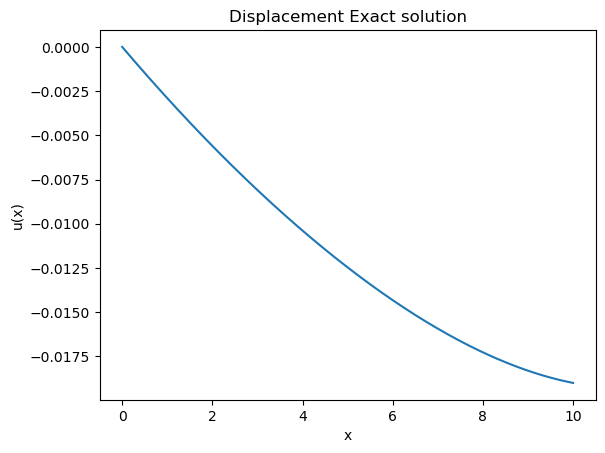

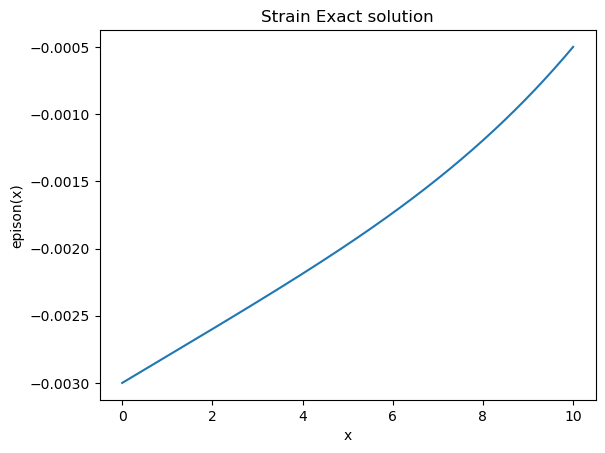

In [35]:
#Graphing the exact solution
u_np = u.subs({Delta_T:400,alpha:10**-6,EA:10**6,L:10,Q:-500})
u_np = lambdify(x,u_np)
x_linspace = np.linspace(0,10,1000)
plt.plot(x_linspace,u_np(x_linspace))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Displacement Exact solution')
plt.show()
# strain
strain_np = strain.subs({Delta_T:400,alpha:10**-6,EA:10**6,L:10,Q:-500})
strain_np = lambdify(x,strain_np)
plt.plot(x_linspace,strain_np(x_linspace))
plt.xlabel('x')
plt.ylabel('epison(x)')
plt.title('Strain Exact solution')
plt.show()

In [64]:
# FEM soltution
    # displaying equations to make handwork easier
def N_i(h):
    return sp.Matrix([[1-x/h],[x/h]])
def F_T(h):
    return sp.integrate(EA * alpha * Delta_T * N_i(h).diff(x), (x, 0, h))
def F_dist(h):
    f = 200*(1-x**3/L**3)
    return sp.integrate(f * N_i(h),(x,0,h))
def K(h):
    return EA/h * sp.Matrix([[1,-1],[-1,1]])
    # 0-1 sympy
print('Displaying matrices for nodes 0 to 1')
displayEquations('K_0', K(5))
displayEquations('N_0', N_i(5))
displayEquations('F_T_0', F_T(5))
displayEquations('F_dist_0', F_dist(5))
LHS_0 = F_T(5) + F_dist(5)
print('printing LHS_0')
displayEquations('LHS_0', LHS_0)

Displaying matrices for nodes 0 to 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

printing LHS_0


<IPython.core.display.Math object>

In [59]:
LHS_1 = F_T(3) + F_dist(3)
displayEquations('LHS_1', LHS_1)
LHS_2 = F_T(2) + F_dist(2) + sp.Matrix([[0],[-500]])
displayEquations('LHS_2', LHS_2)
# Assemblying the full LHS
LHS = sp.Matrix([LHS_0,LHS_1, LHS_2])
displayEquations('LHS', LHS)
# plugging in the values
LHS = LHS.subs({EA:10**6,Delta_T:500,alpha:10**-6,L:10})
displayEquations('LHS', LHS)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [87]:
# Direct Assembly 
K_0 = K(5).subs({EA:10**6})
K_1 = K(3).subs({EA:10**6})
K_2 = K(2).subs({EA:10**6})
K_global = np.zeros((4,4))
K_global[0][0],K_global[0][1] = K_global[1][0] + K_0[0], K_global[0][1] + K_0[1]
K_global[1][0],K_global[1][1] = K_global[1][0]+K_0[2], K_global[1][1]+K_0[3]
K_global[1][1],K_global[1][2] = K_global[1][1] + K_1[0], K_global[1][2] + K_1[1]
K_global[2][1],K_global[2][2] = K_global[2][1]+K_1[2], K_global[2][2]+K_1[3]
K_global[2][2],K_global[2][3] = K_global[2][2] + K_2[0], K_global[2][3] + K_2[1]
K_global[3][2],K_global[3][3] = K_global[3][2]+K_2[2], K_global[3][3]+K_2[3]
print(K_global)
LHS_direct = np.array([[LHS[0]], [LHS[1]+LHS[2]], [LHS[3]+LHS[4]],[LHS[5]]])
print(LHS_direct)
# applying kinematic bc of u(0) = 0
K_global[0][0:] = 0
K_global[1][0] = 0
for i in range(0,3):
    K_global[i][i] = 1
print(K_global)
LHS_direct[0] = 0

[[ 200000.         -200000.               0.               0.        ]
 [-200000.          533333.33333333 -333333.33333333       0.        ]
 [      0.         -333333.33333333  833333.33333333 -500000.        ]
 [      0.               0.         -500000.          500000.        ]]
[[-6.25000000000000]
 [774.190000000000]
 [496.600000000000]
 [199.360000000000]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -3.33333333e+05  0.00000000e+00]
 [ 0.00000000e+00 -3.33333333e+05  1.00000000e+00 -5.00000000e+05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e+05  5.00000000e+05]]


In [88]:
displacement_array = np.linalg.inv(K_global) @ LHS_direct
print(displacement_array)

[[0]
 [0.00139596175047469]
 [-0.00232256581211475]
 [-0.00192384581211475]]


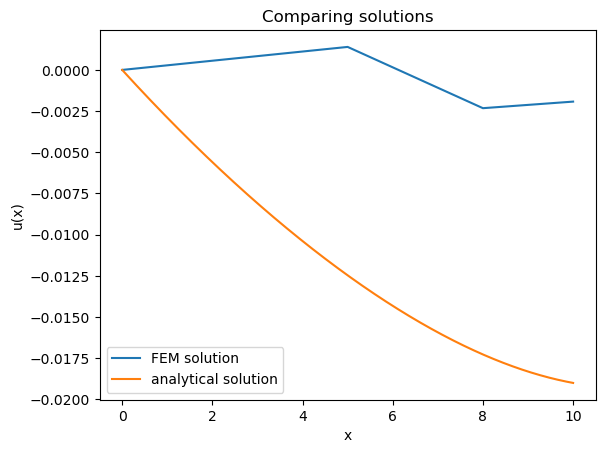

In [91]:
# comparing fem u(x) to analytical solution
x_postions = np.array([0,5,8,10])
plt.plot(x_postions,displacement_array,label='FEM solution')
plt.plot(x_linspace,u_np(x_linspace),label='analytical solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparing solutions')
plt.legend()
plt.show()

[array([0.000279192350094938], dtype=object), array([-0.00123950918752981], dtype=object), array([0.000199360000000000], dtype=object)]


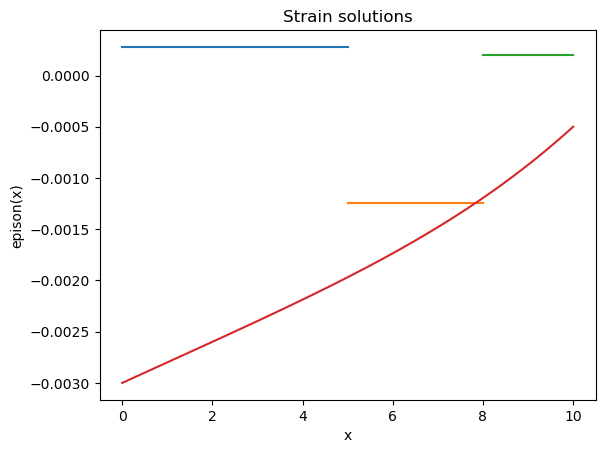

In [95]:
y_prime_list = []
for i in range(1, len(displacement_array)):
    y_prime_list.append((displacement_array[i] - displacement_array[i-1])/(x_postions[i] - x_postions[i-1]))
print(y_prime_list)
y0 = [y_prime_list[0]] * 10
y1 = [y_prime_list[1]] * 10
y2 = [y_prime_list[2]] * 10
x0 = np.linspace(0, 5, 10)
x1 = np.linspace(5, 8, 10)
x2 = np.linspace(8, 10, 10)
plt.plot(x0, y0)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x_linspace,strain_np(x_linspace))
plt.xlabel('x')
plt.ylabel('epison(x)')
plt.title('Strain solutions')
plt.show()